In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
rs_palette <- c("gray", "#1b9e77", "#7570b3", "#e6ab02")
p_palette <- c('orchid1', 'purple1', 'darkorchid4')
i_palette <- c('grey', 'lightblue', 'darkblue')
t_palette <- c('darkgreen', 'mediumpurple4')
b_palette <- c('#ffd4a3', '#ffaa5e', '#d08159')
y_palette <- c('dodgerblue4', 'springgreen1', '#cc77ff')#'#f0b4d2')
r_palette <- viridisLite::viridis(9)
contrast_palette <- viridisLite::viridis(6)

In [10]:
levels(d$Timepoint)


[1] "2017_Anthesis" "2017_Veraison" "2017_Harvest"  "2018_Anthesis"
[5] "2018_Veraison" "2018_Harvest"  "2019_Anthesis" "2019_Veraison"
[9] "2019_Harvest"

## Heatmap

In [8]:
d <- read.csv('1719_geneExpression_numGenes_table.csv')
d$Contrast <- factor(d$Contrast, levels=c('1103P - Ungrafted', '3309C - Ungrafted', 'SO4 - Ungrafted', 
                                          '3309C - 1103P', 'SO4 - 1103P', 'SO4 - 3309C'),
                    labels=c ('Ungrafted - 1103P', 'Ungrafted - 3309C', 'Ungrafted - SO4', 
                              '1103P - 3309C', '1103P - SO4', '3309C - SO4'))

d$Timepoint <- paste(d$Year, d$Phenology, sep='_')
d$Timepoint <- factor(d$Timepoint, levels=c('2017_Anthesis', '2017_Veraison', '2017_Harvest', 
                                            '2018_Anthesis', '2018_Veraison', '2018_Harvest', 
                                            '2019_Anthesis', '2019_Veraison', '2019_Harvest'))

head(d)

Tissue,Year,Phenology,Contrast,Direction,Num_genes,Timepoint
Leaf,2017,Anthesis,Ungrafted - 1103P,Up,8,2017_Anthesis
Leaf,2017,Anthesis,Ungrafted - 1103P,Down,3,2017_Anthesis
Leaf,2017,Anthesis,Ungrafted - 3309C,Up,7,2017_Anthesis
Leaf,2017,Anthesis,Ungrafted - 3309C,Down,5,2017_Anthesis
Leaf,2017,Anthesis,Ungrafted - SO4,Up,9,2017_Anthesis
Leaf,2017,Anthesis,Ungrafted - SO4,Down,2,2017_Anthesis


In [69]:
#pdf('1719_geneExpression_nGeneTrace.pdf', height=6, width=6)
aa <- ggplot(d, aes(x=Timepoint, y=Num_genes, group=paste(Contrast, Direction), color=Contrast)) + 
  geom_line(alpha=1, lwd=1.2) + 
  #geom_point(size=2) + 
  scale_color_manual(values=contrast_palette) + 
  facet_grid(rows=vars(Tissue), cols=vars(Direction)) + 
  theme_bw() + 
  theme(axis.text.x=element_text(angle = 90, hjust = 1, vjust=0.5), legend.position='none')
#dev.off()

In [83]:
d$TissueContrast <- paste(d$Tissue, d$Contrast, sep=': ')
d$TissueContrast <- factor(d$TissueContrast, levels=rev(c('Leaf: Ungrafted - 1103P', 'Leaf: Ungrafted - 3309C', 'Leaf: Ungrafted - SO4',
                                                      'Leaf: 1103P - 3309C', 'Leaf: 1103P - SO4', 'Leaf: 3309C - SO4',
                                                      'Reproductive: Ungrafted - 1103P', 'Reproductive: Ungrafted - 3309C', 'Reproductive: Ungrafted - SO4',
                                                      'Reproductive: 1103P - 3309C', 'Reproductive: 1103P - SO4', 'Reproductive: 3309C - SO4')))


#pdf('1719_geneExpression_nGeneHeatmap.pdf', height=6, width=10)
bb <- ggplot(d, aes(x=Timepoint, y=TissueContrast, fill=Num_genes)) + 
  geom_tile() + 
  scale_fill_gradient(low='white', high='darkorchid4') + 
  scale_x_discrete(position='top', labels=c('17A', '17V', '17H', '18A', '18V', '18H', '19A', '19V', '19H')) +
  facet_wrap('Direction') + 
  theme_bw() + 
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=12, face="bold"),
        legend.position = "bottom")
 
#dev.off()



In [84]:
pdf('1719_geneExpression_options.pdf', height=6, width=16)
  ggpubr::ggarrange(aa, bb, nrow=1, ncol=2, legend.position=F, labels=c('A', 'B'), widths = c(6/16, 10/16))
dev.off()

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”Warning message in as_grob.default(plot):
“Cannot convert object of class logical into a grob.”

$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

pdf 
  2

## EffSize Scan

In [240]:
d <- read.csv('1719_geneExpression_effectSize.csv')
d$rootstock <- factor(d$rootstock, levels=c('Ungrafted_1103P', 'Ungrafted_3309C', 'Ungrafted_SO4',
                                            '1103P_3309C', '1103P_SO4', '3309C_SO4'),
                      labels=c('Ungrafted - 1103P', 'Ungrafted - 3309C', 'Ungrafted - SO4',
                               '1103P - 3309C', '1103P - SO4', '3309C - SO4'))

d$phenology <- factor(d$phenology, levels=c('Anthesis', 'Veraison', 'Harvest'))

head(d)

X,filename,direction,tissue,year,phenology,rootstock,log2foldChangeValue,numGenes
1,Leaf_2017_Anthesis_1103P-3309C.csv,Up,Leaf,2017,Anthesis,1103P - 3309C,0.00,5
2,Leaf_2017_Anthesis_1103P-3309C.csv,Up,Leaf,2017,Anthesis,1103P - 3309C,0.05,5
3,Leaf_2017_Anthesis_1103P-3309C.csv,Up,Leaf,2017,Anthesis,1103P - 3309C,0.10,5
4,Leaf_2017_Anthesis_1103P-3309C.csv,Up,Leaf,2017,Anthesis,1103P - 3309C,0.15,5
5,Leaf_2017_Anthesis_1103P-3309C.csv,Up,Leaf,2017,Anthesis,1103P - 3309C,0.20,5
6,Leaf_2017_Anthesis_1103P-3309C.csv,Up,Leaf,2017,Anthesis,1103P - 3309C,0.25,5


In [247]:
d %>% 
  filter(tissue=='Leaf' & year==2018 & log2foldChangeValue == 2) %>%
  group_by(phenology, rootstock) %>%
  summarise(s=sum(numGenes))

1 - 59 / 129
1 - 423 / 5962
1 - 1030 / 6935

phenology,rootstock,s
Anthesis,Ungrafted - 1103P,59
Anthesis,Ungrafted - 3309C,286
Anthesis,Ungrafted - SO4,89
Anthesis,1103P - 3309C,244
Anthesis,1103P - SO4,38
Anthesis,3309C - SO4,212
Veraison,Ungrafted - 1103P,423
Veraison,Ungrafted - 3309C,37
Veraison,Ungrafted - SO4,164
Veraison,1103P - 3309C,260


[1] 0.5426357

[1] 0.9290507

[1] 0.851478

pdf 
  2

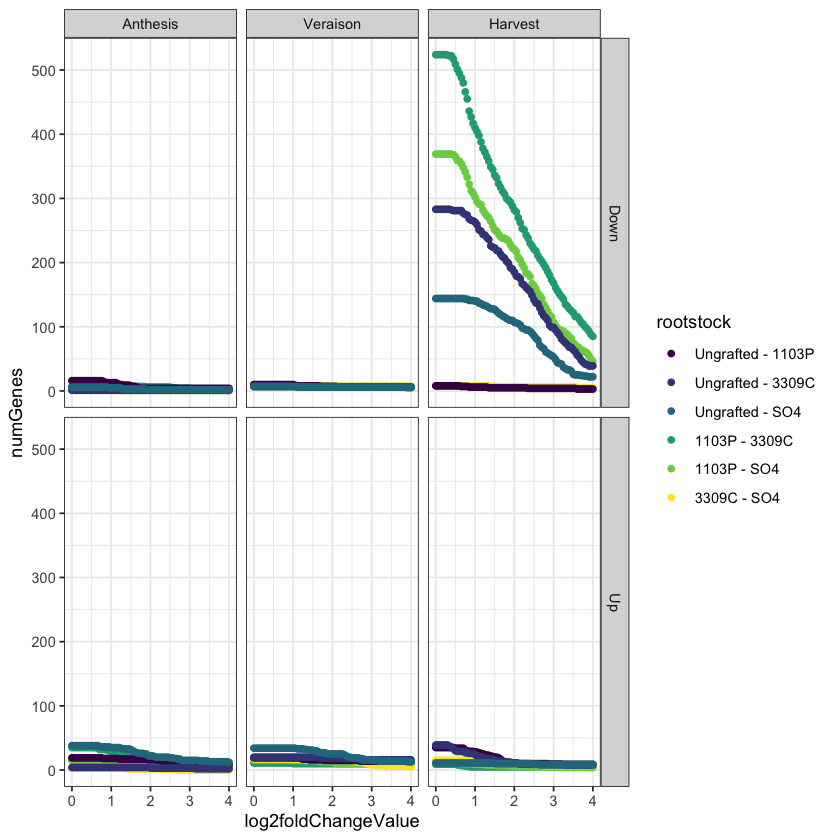

In [105]:
pdf('1719_geneExpression_effSize.pdf', height=6, width=7)

d %>% 
  filter(tissue == 'Leaf' & year == 2018) %>%
  ggplot(aes(x=log2foldChangeValue, y=numGenes, color=rootstock)) + 
    geom_point() + 
    facet_grid(rows=vars(direction), cols=vars(phenology)) +
    scale_color_manual(values=viridisLite::viridis(6)) + 
    theme_bw()
dev.off()

d %>% 
  filter(tissue == 'Reproductive' & year == 2018) %>%
  ggplot(aes(x=log2foldChangeValue, y=numGenes, color=rootstock)) + 
    geom_point() + 
    facet_grid(rows=vars(direction), cols=vars(phenology)) +
    scale_color_manual(values=viridisLite::viridis(6)) + 
    theme_bw()

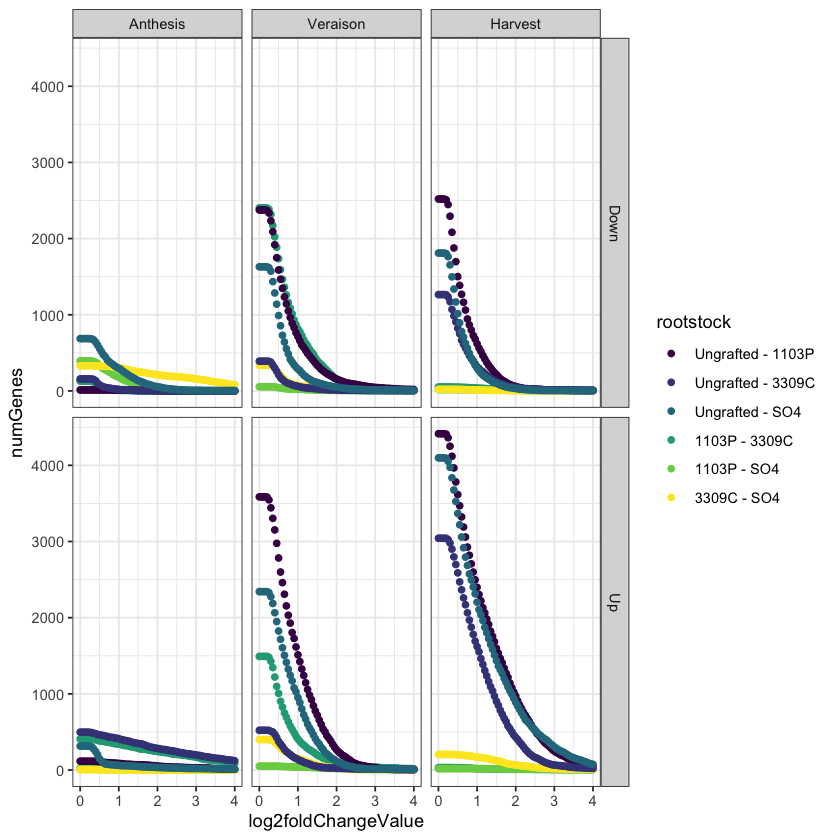

In [104]:
aa

In [109]:
pdf('1719_geneExpression_PhenologyDirection_template.pdf', height=10, width=15)
ggplot(d) + 
  facet_grid(rows=vars(direction), cols=vars(phenology)) +
  theme_bw()
dev.off()

pdf 
  2

## Alignment Stats

In [177]:
d17 <- read.csv('../2017_alignmentStats.csv')
d17$year <- 2017
d18 <- read.csv('../2018_alignmentStats.csv')
d18$year <- 2018
d19 <- read.csv('../2019_alignmentStats.csv')
d19$year <- 2019

d <- rbind(d17, d18, d19)
d$samplename <- str_replace(d$fileName, pattern="Log.final.out", replace='')
colnames(d)

[1] "X"                  "fileName"           "num_reads"         
 [4] "num_unique"         "uniquePercent"      "avgMapLength"      
 [7] "pctGT_AG"           "pctGC_AG"           "pctAT_AC"          
[10] "pctNonCanonical"    "mismatchRate"       "deletionRate"      
[13] "deletionAvgLength"  "insertionRate"      "insertionAvgLength"
[16] "pctMulitpleLoci"    "pctTooManyLoci"     "pctTooManyMismatch"
[19] "pctTooShort"        "pctUnmappedOther"   "year"              
[22] "samplename"

In [180]:
mean(d$num_reads)
sd(d$num_reads)

mean(d$num_unique)
sd(d$num_unique)

mean(d$uniquePercent)
sd(d$uniquePercent)

mean(d$pctMulitpleLoci)
sd(d$pctMulitpleLoci)

mean(d$pctTooManyLoci)
sd(d$pctTooManyLoci)

mean(d$pctTooManyMismatch)
sd(d$pctTooManyMismatch)

mean(d$pctTooShort)
sd(d$pctTooShort)

mean(d$pctUnmappedOther)
sd(d$pctUnmappedOther)

[1] 4040723

[1] 1355769

[1] 3442671

[1] 1146986

[1] 85.08163

[1] 5.057521

[1] 3.882096

[1] 0.5217366

[1] 0.06346939

[1] 0.02405586

[1] 0

[1] 0

[1] 10.97097

[1] 5.136987

[1] 7.064364e-05

[1] 0.0008378526

In [230]:
d_genes <- read.csv('~/Downloads/NoFeature.out', header=F)
mean(d_genes$V1)
sd(d_genes$V1)

[1] 148473.7

[1] 80314.65

## GO Terms

### SOMs

pdf 
  2

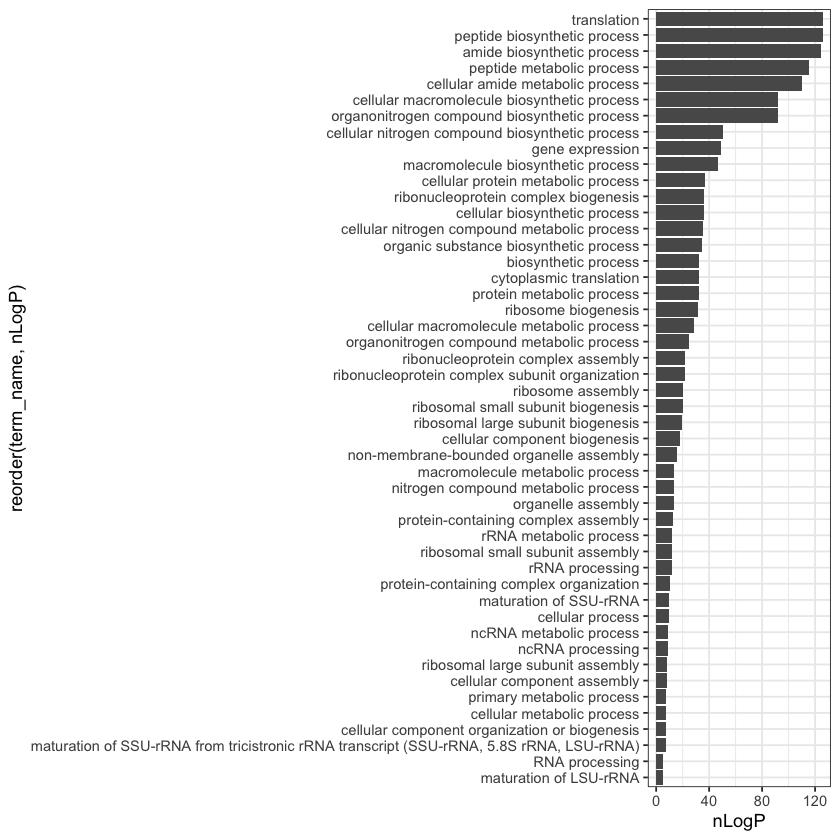

In [231]:
d <- read.csv('drive-download-20220312T194004Z-001/GOBP_SOM_go_terms.csv')
d$nLogP <- -log10(d$p_value)

aa <- d %>%
  filter(name=='GOBP_SOM_cluster_3') %>%
  ggplot(., aes(x=reorder(term_id, nLogP), y=nLogP)) + 
    geom_bar(stat="identity") +
    coord_flip() + 
    theme_bw()

bb <- d %>%
  filter(name=='GOBP_SOM_cluster_4') %>%
  ggplot(., aes(x=reorder(term_name, nLogP), y=nLogP)) + 
    geom_bar(stat="identity") +
    coord_flip() + 
    theme_bw()

cc <- d %>%
  filter(name=='GOBP_SOM_cluster_7') %>%
  ggplot(., aes(x=reorder(term_id, nLogP), y=nLogP)) + 
    geom_bar(stat="identity") +
    coord_flip() + 
    theme_bw()

pdf('wtf.pdf', width=12, height=36)
  ggpubr::ggarrange(aa, bb, cc, ncol=3)
dev.off()

bb

### Contrasts

In [220]:
d <- read.csv('drive-download-20220312T194004Z-001/GOBP_contrast_go_terms.csv')
d$nLogP <- -log10(d$p_value)
head(d)

levels(d$contrast)

X,tissue,year,phenology,direction,contrast,source,term_id,term_name,p_value,nLogP
1,Leaf,2018,Anthesis,Up,Ungrafted-3309C,GO:BP,GO:0045490,pectin catabolic process,6.415214e-05,4.192789
2,Leaf,2018,Anthesis,Down,Ungrafted-3309C,GO:BP,GO:0045292,"mRNA cis splicing, via spliceosome",6.609604e-06,5.179825
3,Leaf,2018,Anthesis,Down,Ungrafted-3309C,GO:BP,GO:0016233,telomere capping,7.275032e-06,5.138165
4,Leaf,2018,Anthesis,Down,Ungrafted-3309C,GO:BP,GO:0090304,nucleic acid metabolic process,1.555706e-05,4.808072
5,Leaf,2018,Anthesis,Down,Ungrafted-3309C,GO:BP,GO:0006396,RNA processing,2.218211e-05,4.653997
6,Leaf,2018,Anthesis,Down,Ungrafted-3309C,GO:BP,GO:0000722,telomere maintenance via recombination,4.331194e-05,4.363392


[1] "1103P-3309C"     "1103P-SO4"       "3309C-SO4"       "Ungrafted-1103P"
[5] "Ungrafted-3309C" "Ungrafted-SO4"

In [222]:
#truly beautiful code
for (phen in levels(d$phenology)){
    for (dir in levels(d$direction)){
        for (cont in levels(d$contrast)){
            pdf(str_interp('../Figures/Random_pieces/GO_terms_contrasts/${phen}_${dir}_${cont}.pdf'))
            dd <- d %>%
              filter(phenology == phen & direction == dir & contrast == cont) %>%
              ggplot(., aes(x=reorder(term_name, nLogP), y=nLogP)) + 
                geom_bar(stat="identity") +
                coord_flip() + 
                theme_bw()
            print(dd)
            dev.off()
        }
    }
}



### Overlaps

In [232]:
d <- read.csv('drive-download-20220312T194004Z-001/GOBP_overlaps_go_terms.csv')
d$nLogP <- -log10(d$p_value)
head(d)

levels(d$overlapping.rootstocks)

X,year,phenology,tissue,direction,overlapping.rootstocks,source,term_id,term_name,p_value,nLogP
1,2018,Anthesis,Leaf,Up,3309C-SO4,GO:BP,GO:0006886,intracellular protein transport,5.286269e-05,4.276851
2,2018,Anthesis,Leaf,Up,3309C-SO4,GO:BP,GO:0034613,cellular protein localization,5.286269e-05,4.276851
3,2018,Anthesis,Leaf,Up,3309C-SO4,GO:BP,GO:0070727,cellular macromolecule localization,5.286269e-05,4.276851
4,2018,Anthesis,Leaf,Up,3309C-SO4,GO:BP,GO:0015031,protein transport,8.475438e-05,4.071838
5,2018,Anthesis,Leaf,Up,3309C-SO4,GO:BP,GO:0045184,establishment of protein localization,8.475438e-05,4.071838
6,2018,Anthesis,Leaf,Up,3309C-SO4,GO:BP,GO:0008104,protein localization,1.386288e-04,3.858147


[1] "1103P"           "1103P-3309C-SO4" "1103P-SO4"       "3309C"          
[5] "3309C-SO4"       "SO4"

In [234]:
d %>% 
  filter(overlapping.rootstocks=='1103P-3309C-SO4' & phenology == 'Harvest' & direction=='Up') %>% 
  select(term_id, p_value)

term_id,p_value
GO:0007017,5.715462e-21
GO:0007010,1.152323e-13
GO:0007018,4.343578e-13
GO:0006928,4.343578e-13
GO:0071554,1.004896e-12
GO:0000226,2.343132e-12
GO:0007049,6.836483e-12
GO:0022402,6.275268e-11
GO:0000278,1.215438e-10
GO:0005975,2.667578e-09


In [225]:
for (phen in levels(d$phenology)){
    for (dir in levels(d$direction)){
        for (cont in levels(d$overlapping.rootstocks)){
            pdf(str_interp('../Figures/Random_pieces/GO_terms_overlaps/${phen}_${dir}_${cont}.pdf'))
            dd <- d %>%
              filter(phenology == phen & direction == dir & overlapping.rootstocks == cont) %>%
              ggplot(., aes(x=reorder(term_name, nLogP), y=nLogP)) + 
                geom_bar(stat="identity") +
                coord_flip() + 
                theme_bw()
            print(dd)
            dev.off()
        }
    }
}



In [226]:
d <- read.csv('drive-download-20220312T194004Z-001/GOBP_PC_go_terms.csv')
d$nLogP <- -log10(d$p_value)
head(d)

levels(d$overlapping.rootstocks)

X,name,source,term_id,term_name,p_value,nLogP
1,PC105_high_loaders,GO:BP,GO:0009451,RNA modification,4.936905e-07,6.306545
2,PC10_high_loaders,GO:BP,GO:0009408,response to heat,5.885890e-20,19.230188
3,PC10_high_loaders,GO:BP,GO:0009266,response to temperature stimulus,4.958940e-15,14.304611
4,PC10_high_loaders,GO:BP,GO:0051259,protein complex oligomerization,4.958940e-15,14.304611
5,PC10_high_loaders,GO:BP,GO:0042542,response to hydrogen peroxide,1.832434e-14,13.736972
6,PC10_high_loaders,GO:BP,GO:0006457,protein folding,1.935641e-14,13.713175


NULL

In [228]:
for (pc in levels(d$name)){
    pdf(str_interp('../Figures/Random_pieces/GO_terms_PCs/${pc}.pdf'))
    dd <- d %>%
      filter(name == pc) %>%
      ggplot(., aes(x=reorder(term_name, nLogP), y=nLogP)) + 
        geom_bar(stat="identity") +
        coord_flip() + 
        theme_bw()
    print(dd)
    dev.off()
}

In [239]:
xx <- read.csv('~/Downloads/Revigo_leaf_anthesis_2018_up_ungrafted-3309c.csv')

xx %>% filter(Eliminated == ' False')

TermID,Name,Frequency,PlotX,PlotY,LogSize,Value,Uniqueness,Dispensability,Representative,Eliminated
GO:0045490,pectin catabolic process,0.08569669,0,0,4.315677,-4.192789,1,0,null,False


In [238]:
levels(xx$Eliminated)

[1] " False"